<a href="https://colab.research.google.com/github/WhatTheMahad/Twitter_Sentiment_Analysis/blob/main/Copy_of_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from textblob import TextBlob
import csv
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mahad.csv to mahad (1).csv


In [ ]:
post = pd.read_csv("mahad.csv")

In [ ]:
with open('mahad.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t{row[0]}.')
            line_count += 1
    print(f'Total {line_count} Tweets.')

Column names are ﻿"Text1
	
I have 4 assignments.
	I don't understand Pashto.".
	Hi .
	What if every atom in the universe has its own little universe inside of it? 

.
	Ignorance is bliss..
	Bring Back MESUT .
	What you think, you become..
	Last Year's Resolution Happily Failed. Still got 7 unread books. 
Press F to salute my Will Power..
	Man cannot discover new oceans unless he has the courage to lose sight of the shore.

-Andre Gide.
	So much Truth in one picture .
	Yes, you can have my damn cookie! should be a browser setting.
	Hope heals.
	It's always "Stepbrother, what are you doing?" and never "Stepbrother, HOW are you doing?"
- .
	It all comes down to one thing, How bad do you want it?.
	Because you see, to them, a just world is a sane world.

-Chernobyl.
	So much to unlearn..
	And every generation must know it's own suffering. 

~Chernobyl.
	WTF is even mean by "Ghair Qanuni Yaar Mere"?.
	It is narrated on the authority of Jabir that he heard the Apostle (may peace and blessing

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.read_csv("mahad.csv")
# Show the first 5 rows of data
df.head()

,Text1\n
0,"I have 4 assignments, 1 university deadline du..."
1,Hi
2,What if every atom in the universe has its own...
3,Ignorance is bliss.
4,Bring Back MESUT


In [ ]:
#clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Text1\n'] = df['Text1\n'].apply(cleanTxt)

# Show the cleaned tweets
df

,Text1\n
0,"I have 4 assignments, 1 university deadline du..."
1,Hi
2,What if every atom in the universe has its own...
3,Ignorance is bliss.
4,Bring Back MESUT
5,"What you think, you become."
6,Last Year's Resolution Happily Failed. Still g...
7,Man cannot discover new oceans unless he has t...
8,So much Truth in one picture
9,"Yes, you can have my damn cookie! should be a ..."


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Text1\n'].apply(getSubjectivity)
df['Polarity'] = df['Text1\n'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Text1\n,Subjectivity,Polarity
0,"I have 4 assignments, 1 university deadline du...",0.375000,-0.125000
1,Hi,0.000000,0.000000
2,What if every atom in the universe has its own...,0.750000,0.206250
3,Ignorance is bliss.,0.000000,0.000000
4,Bring Back MESUT,0.000000,0.000000
5,"What you think, you become.",0.000000,0.000000
6,Last Year's Resolution Happily Failed. Still g...,0.255556,-0.133333
7,Man cannot discover new oceans unless he has t...,0.454545,0.136364
8,So much Truth in one picture,0.200000,0.200000
9,"Yes, you can have my damn cookie! should be a ...",0.000000,0.000000


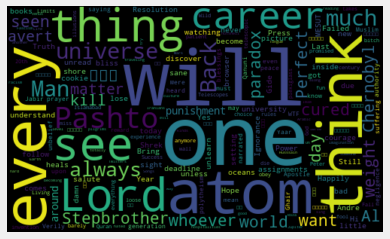

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Text1\n']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Text1\n,Subjectivity,Polarity,Analysis
0,"I have 4 assignments, 1 university deadline du...",0.375000,-0.125000,Negative
1,Hi,0.000000,0.000000,Neutral
2,What if every atom in the universe has its own...,0.750000,0.206250,Positive
3,Ignorance is bliss.,0.000000,0.000000,Neutral
4,Bring Back MESUT,0.000000,0.000000,Neutral
5,"What you think, you become.",0.000000,0.000000,Neutral
6,Last Year's Resolution Happily Failed. Still g...,0.255556,-0.133333,Negative
7,Man cannot discover new oceans unless he has t...,0.454545,0.136364,Positive
8,So much Truth in one picture,0.200000,0.200000,Positive
9,"Yes, you can have my damn cookie! should be a ...",0.000000,0.000000,Neutral


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Text1'][i])
    print()
    j= j+1

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Text1'][i])
    print()
    j=j+1

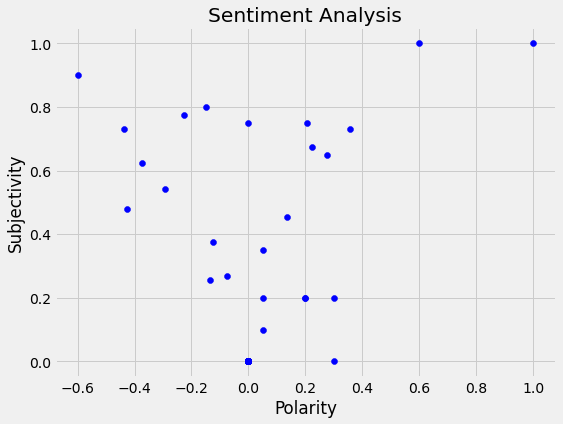

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Text1']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

27.5

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Text1']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

19.6

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Text1']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

52.9

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     27
Positive    14
Negative    10
Name: Analysis, dtype: int64

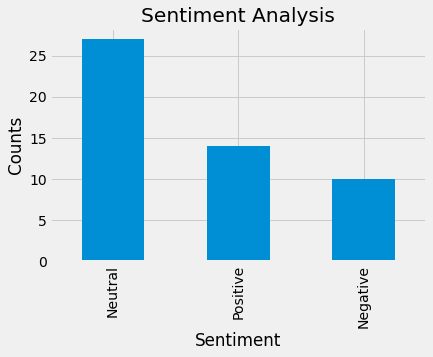

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()